In [1]:
NAME = "Alison Menezes"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("style_balanced_0415.csv")

### Data Preprocessing

In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values:\n {missing_values}")

In [ ]:
print("Summary statistics:\n", df.describe())

### Exploratory Data Analysis

C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\916408352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Driver', order=df['Driver'].value_counts().index, palette='viridis')


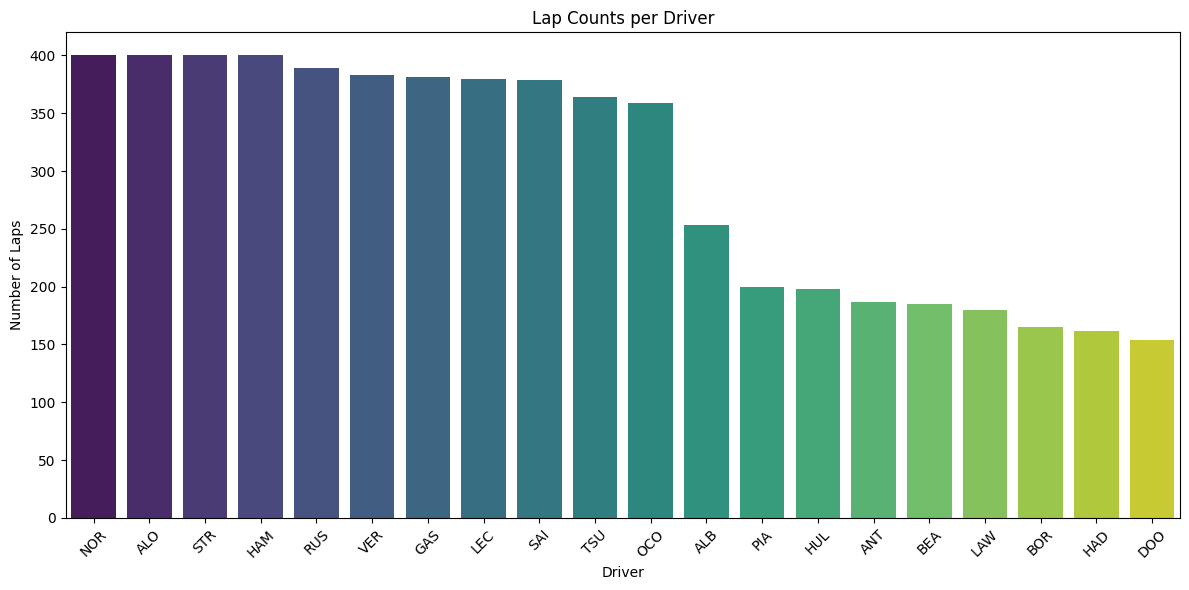

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Driver', order=df['Driver'].value_counts().index, palette='viridis')
plt.title('Lap Counts per Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Laps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

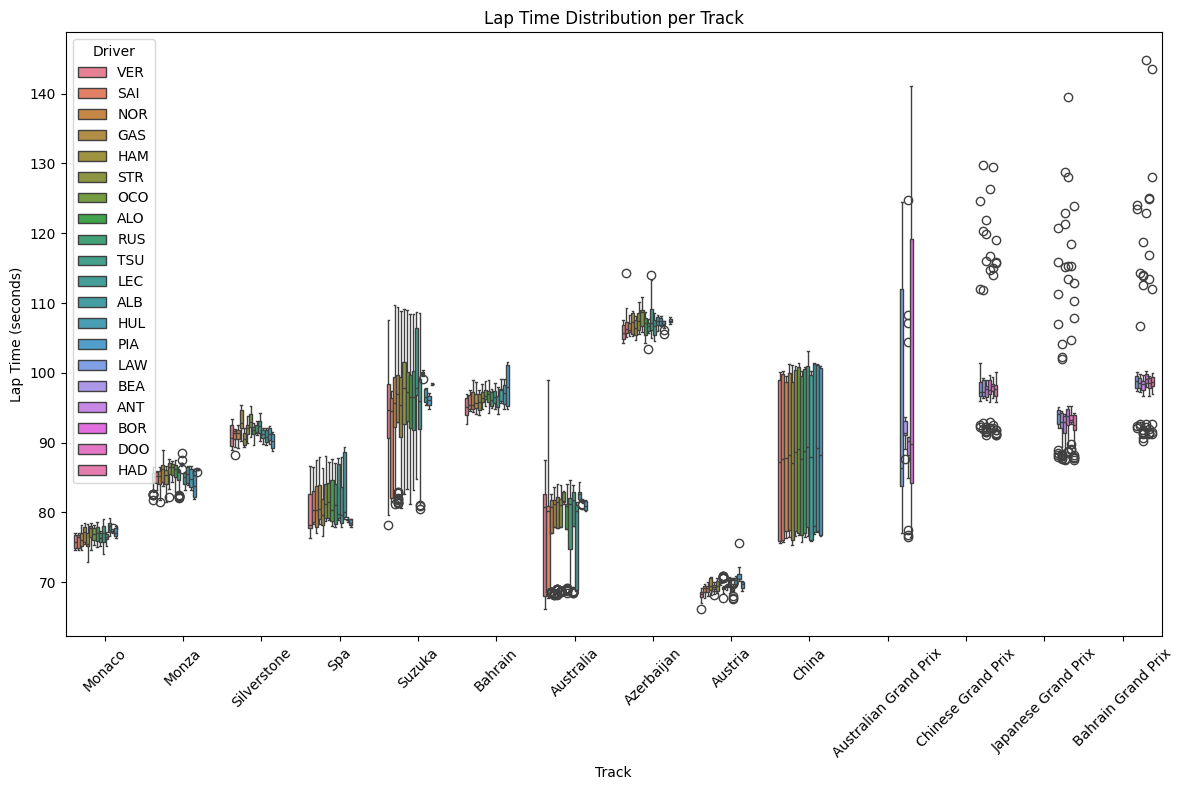

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Track', y='LapTime_s', hue='Driver')
plt.title('Lap Time Distribution per Track')
plt.ylabel('Lap Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\490556103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Driver", y="LapTime_s", palette="pastel")


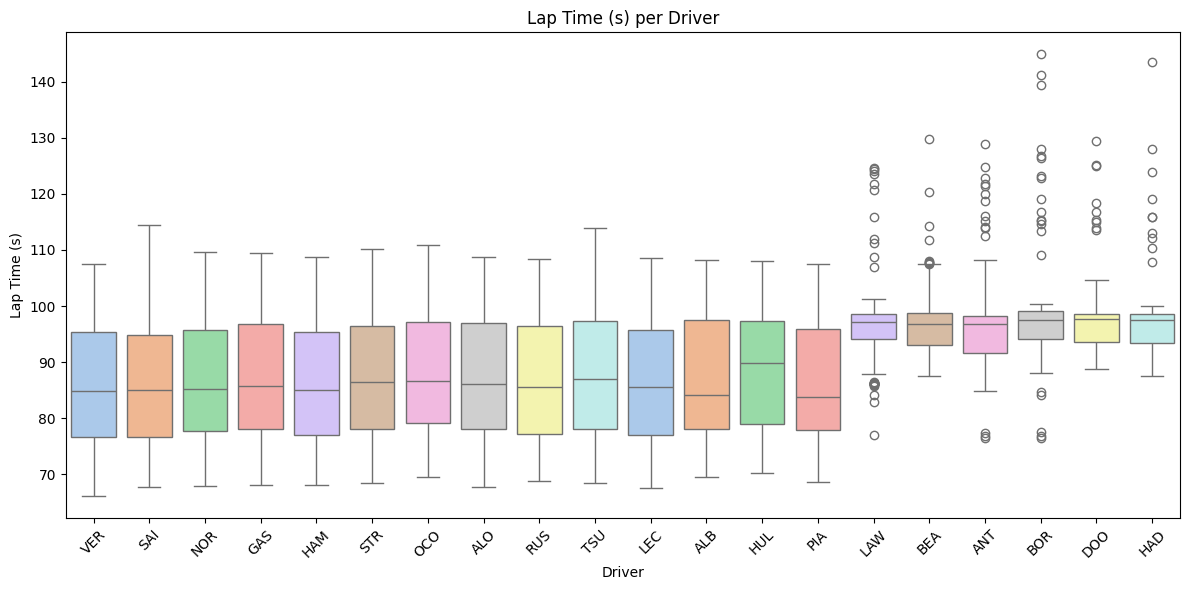

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Driver", y="LapTime_s", palette="pastel")
plt.title("Lap Time (s) per Driver")
plt.ylabel("Lap Time (s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\2757056351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Driver", y="ThrottleMean", palette='pastel')


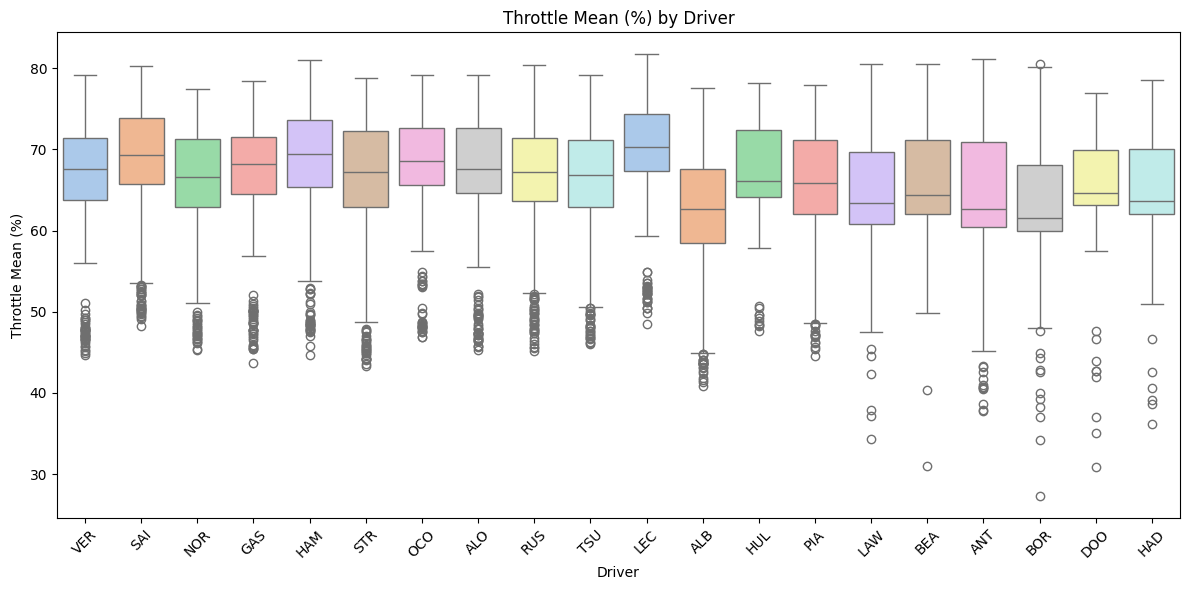

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Driver", y="ThrottleMean", palette='pastel')
plt.title("Throttle Mean (%) by Driver")
plt.ylabel("Throttle Mean (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\3718674480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Driver", y="BrakingEvents", palette="pastel")


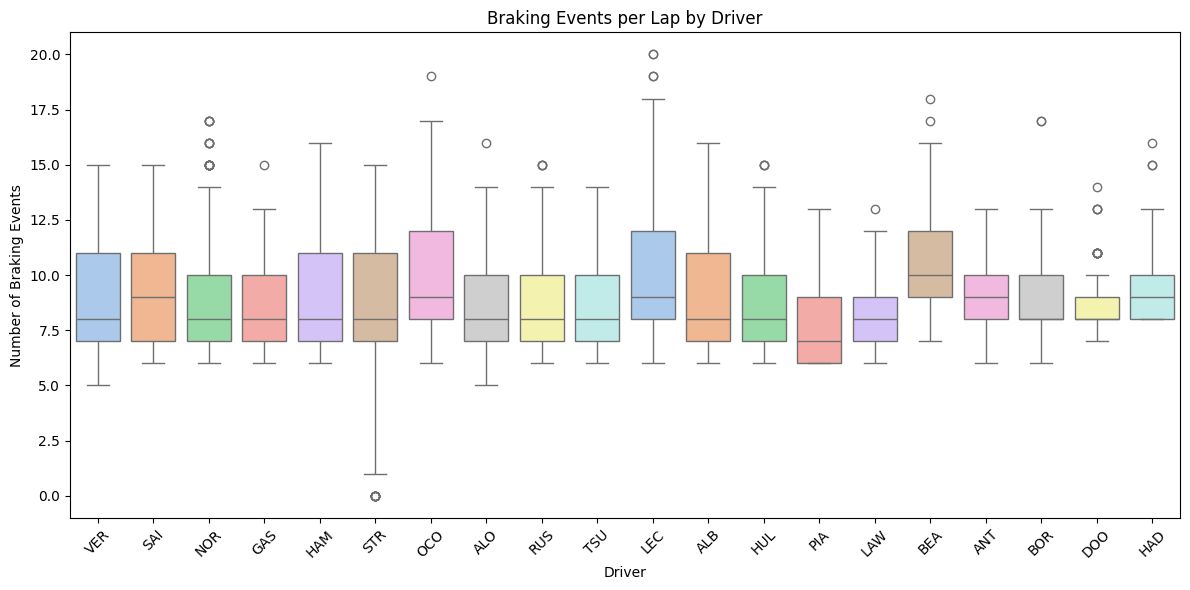

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Driver", y="BrakingEvents", palette="pastel")
plt.title("Braking Events per Lap by Driver")
plt.ylabel("Number of Braking Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

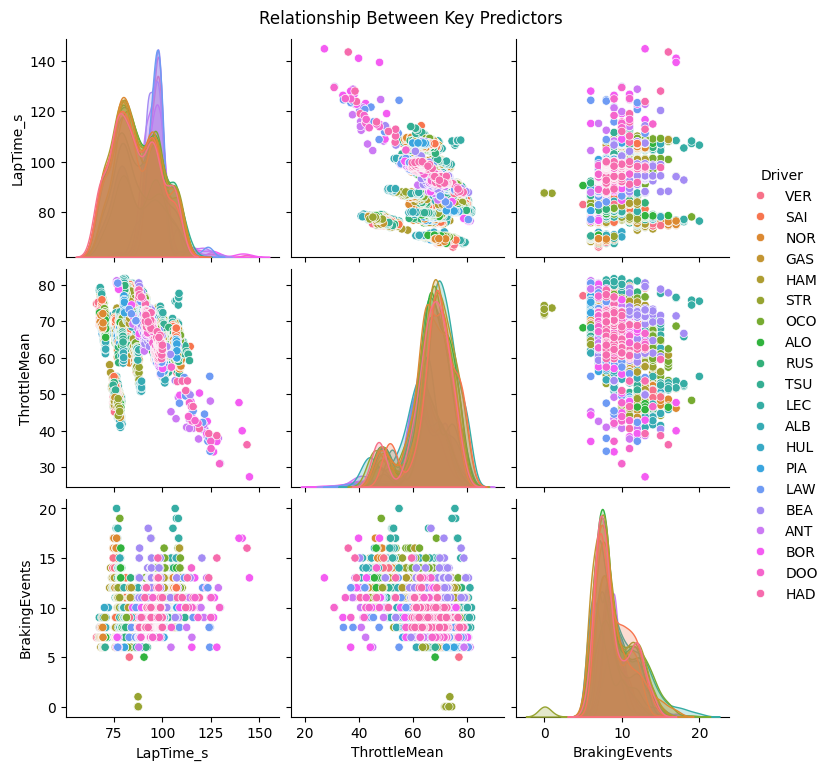

In [16]:
sns.pairplot(df, vars=["LapTime_s", "ThrottleMean", "BrakingEvents"], hue="Driver", height=2.5)
plt.suptitle("Relationship Between Key Predictors", y=1.02)
plt.show()

#### QUESTIONS
##### 1. Can drivers be categorized into a racing “style” based on their previous racing stats? 
##### 2. Based on a driver’s style and telemetry data, can we determine which driver would perform the best in Red Bull’s 2nd seat?

### PART 1: CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
features = ['LapTime_s', 'MeanSpeed', 'MaxSpeed', 'ThrottleMean', 'BrakePct', 'BrakingEvents']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

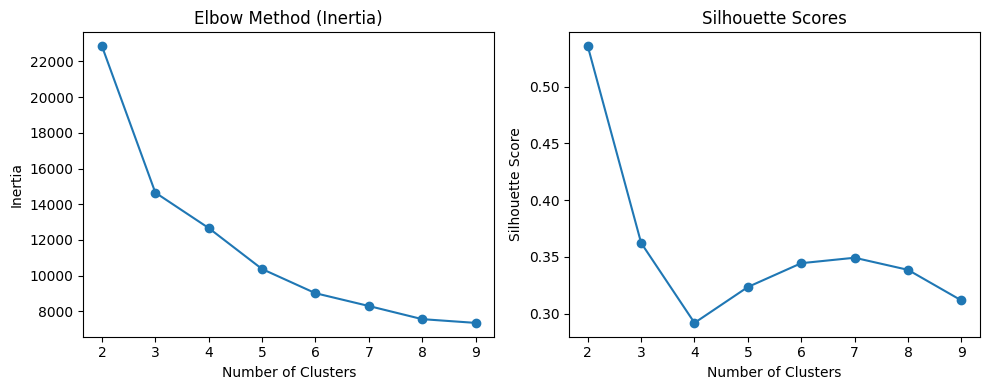

Inertia for k=3: 10376.48
Silhouette Score for k=3: 0.3235


In [102]:
inertia_scores = []
silhouette_scores = []
k_values = range(2, 10) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

print(f"Inertia for k=3: {inertia_scores[3]:.2f}")
print(f"Silhouette Score for k=3: {silhouette_scores[3]:.4f}")

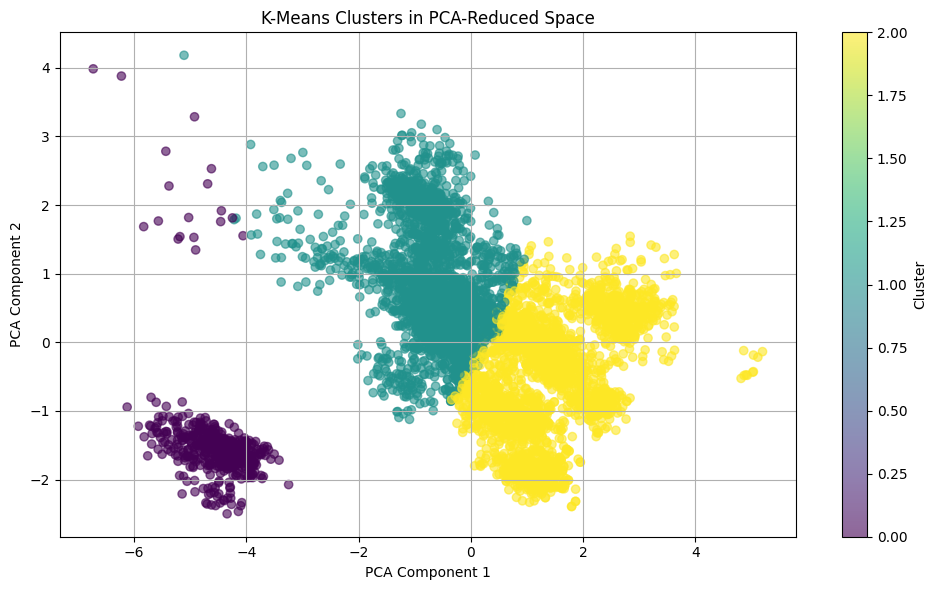

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['StyleCluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['StyleCluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids['ClusterLabel'] = centroids.index
print("\nCluster Centroids (Unscaled):")
print(centroids)


Cluster Centroids (Unscaled):
   LapTime_s   MeanSpeed    MaxSpeed  ThrottleMean   BrakePct  BrakingEvents  \
0  78.220341  154.368635  283.740964     48.991827  28.572870      13.134538   
1  98.815732  200.556699  313.686798     63.756292  20.349231       9.768873   
2  81.744412  224.283039  312.072586     71.695528  15.957543       7.479563   

   ClusterLabel  
0             0  
1             1  
2             2  


C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\729431284.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_driver_majority = df.groupby('Driver').apply(assign_style).reset_index(name='StyleCluster')


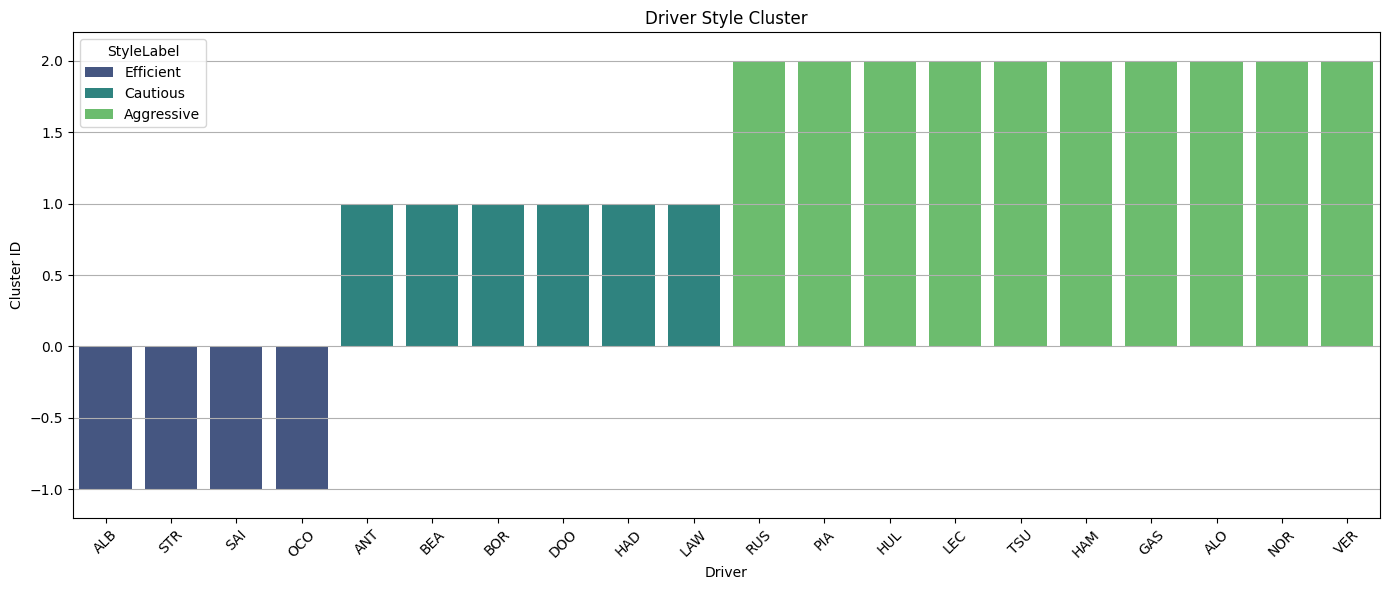

In [104]:
# manually labeling each cluster
def style_label(cluster_id):
    if cluster_id == 2:
        return 'Aggressive'
    elif cluster_id == 1:
        return 'Cautious'
    elif cluster_id == 0:
        return 'Efficient'
    else:
        return 'Efficient'
    
df['StyleLabel'] = df['StyleCluster'].apply(style_label)

def assign_style(group):
    counts = group['StyleCluster'].value_counts(normalize=True)
    if counts.max() > 0.5:
        return counts.idxmax()
    else:
        return -1

# assigning each driver their dominant style and then sorting for the plot
df_driver_majority = df.groupby('Driver').apply(assign_style).reset_index(name='StyleCluster')
df_driver_majority['StyleLabel'] = df_driver_majority['StyleCluster'].apply(style_label)

style_order = ['Efficient', 'Cautious', 'Aggressive']
df_driver_majority['StyleLabel'] = pd.Categorical(df_driver_majority['StyleLabel'], categories=style_order, ordered=True)
df_driver_majority = df_driver_majority.sort_values('StyleLabel')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_driver_majority, x='Driver', y='StyleCluster', hue='StyleLabel', dodge=False, palette='viridis')
plt.title("Driver Style Cluster")
plt.ylabel("Cluster ID")
plt.xlabel("Driver")
plt.ylim(-1.2, 2.2)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='StyleLabel')
plt.show()

### PART 2: LOGISTIC REGRESSION WITH PROBABILITY ESTIMATES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
df_ver = df[df['Driver'] == 'VER']
df_others = df[df['Driver'] != 'VER']

# since I'm trying to compare to verstappen but I have approx. equal amounts of data for each driver, I had to sample
# laps from the rest of the drivers to prevent skewed results
df_others_down = (
    df_others.groupby('Driver').apply(lambda g: g.sample(n=min(len(g), 30), random_state=42)).reset_index(drop=True)
)

C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\468890480.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_others.groupby('Driver').apply(lambda g: g.sample(n=min(len(g), 30), random_state=42)).reset_index(drop=True)


In [101]:
df_balanced = pd.concat([df_ver, df_others_down])
df_balanced['IsMax'] = (df_balanced['Driver'] == 'VER').astype(int)
print(len(df_balanced))

X = scaler.fit_transform(df_balanced[features])
y = df_balanced['IsMax']

model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
model.fit(X, y)

# apply the model to the whole dataset
df['ProbabilityLikeMax'] = model.predict_proba(scaler.transform(df[features]))[:, 1]

avg_prob_by_driver = df.groupby('Driver')['ProbabilityLikeMax'].mean().sort_values(ascending=False)
avg_prob_by_driver = avg_prob_by_driver.drop('VER')

953


C:\Users\Alison\AppData\Local\Temp\ipykernel_22648\2782688009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prob_by_driver.index, y=avg_prob_by_driver.values, palette='magma')


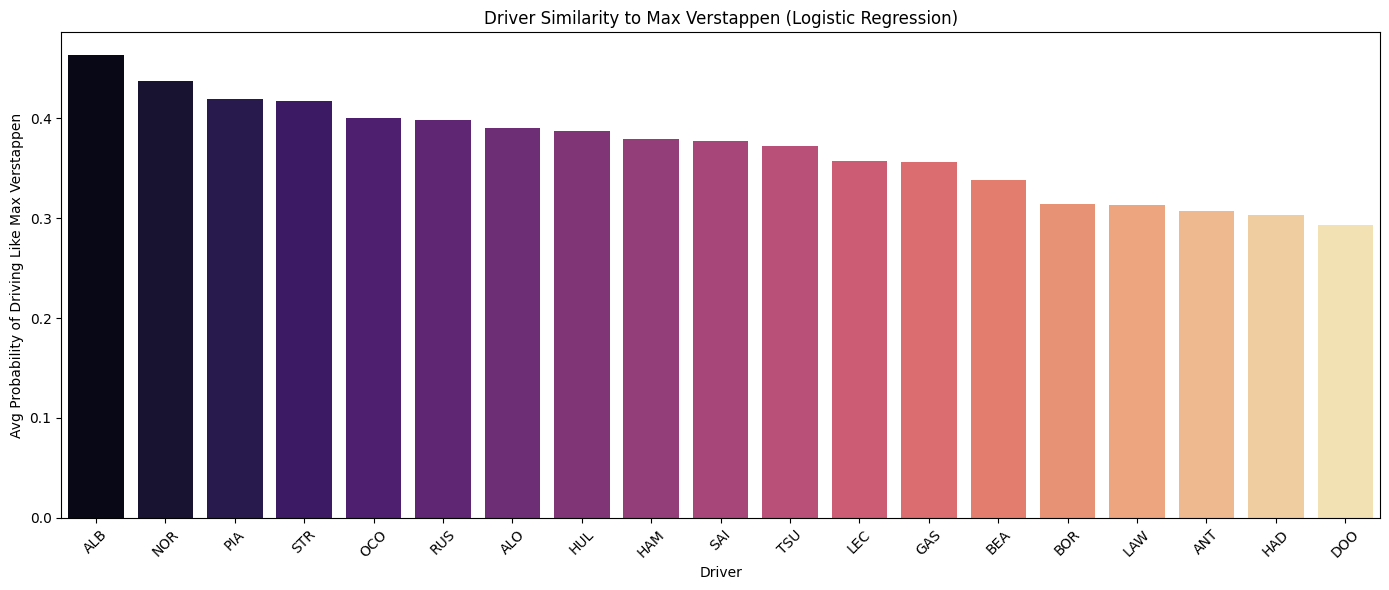

In [103]:
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_prob_by_driver.index, y=avg_prob_by_driver.values, palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Avg Probability of Driving Like Max Verstappen')
plt.title('Driver Similarity to Max Verstappen (Logistic Regression)')
plt.tight_layout()
plt.show()

In [ ]:
# grid search for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best log loss (lower is better):", -grid.best_score_)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best log loss (lower is better): 0.669510141815721


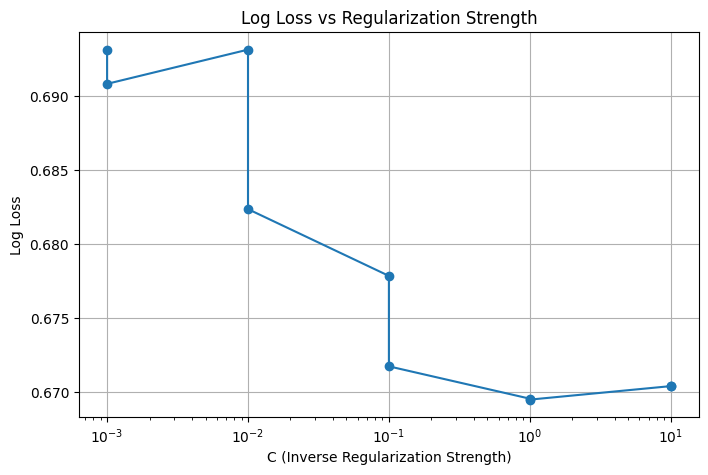

In [49]:
Cs = [params['C'] for params in grid.cv_results_['params']]
log_losses = -grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(Cs, log_losses, marker='o')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Regularization Strength')
plt.grid(True)
plt.show()